## Task 1 - Score Prediction

## Felix Nicholas

## Importing Relevant Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Loading the Data

In [4]:
df = pd.read_csv('student_scores - student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


The dataset contains 2 columns, with 'Hours' representing the time a student spent on studying, and 'Scores' representing their test score.

In [5]:
df.shape

(25, 2)

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Data Visualization

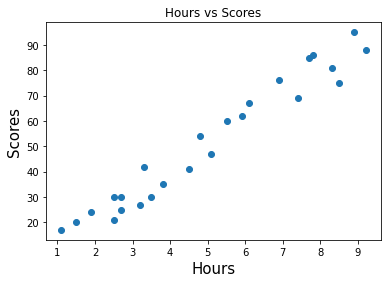

In [8]:
plt.scatter(x=df['Hours'], y =df['Scores'])
plt.title('Hours vs Scores')
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Scores', fontsize = 15)
plt.show()

As observed above, there is a positive linear relationship between the feature and the label.

## Train-Test Split

In [9]:
#Preparing the data
x = df[['Hours']]
y = df['Scores']

In [10]:
#Splitting the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 17)
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(25, 1)
(20, 1)
(5, 1)
(25,)
(20,)
(5,)


## Linear Regression

In [11]:
#Training the model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

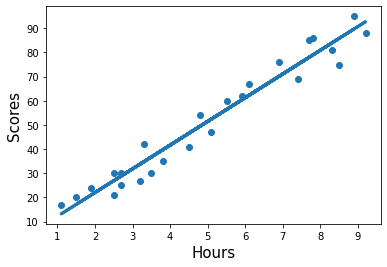

In [12]:
#Plotting the regression line on our data
plt.scatter(x,y)
yhat = model.intercept_ + x*model.coef_
plt.plot(x, yhat, lw = 3)
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Scores', fontsize = 15)
plt.show()

## Performance Analysis

In [13]:
y_pred = model.predict(x_test)

In [17]:
#Analyzing the performance of our model using Root Mean Squared Error
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  4.137463575529366
Mean Squared Error:  20.74241869237642
Root Mean Squared Error:  4.55438455692714


## Making Predictions

In [15]:
#Predicting the score of a student who studied for 9.25 hours
new_data = pd.DataFrame(data = [9.25], columns = ['Hours'])
new_data['Predicted_Score'] = model.predict(new_data)
new_data

,Hours,Predicted_Score
0,9.25,93.240131
